<h2>Task 1 : Prediction using supervised Machine Learning<h2>
<h3>Name : Rishika Dhar<h3> 
<h3>Problem Statement : Predict percentage score based on study hours of a student<h3>

In [1]:
#import libraries#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read data from url#
df = pd.read_csv('http://bit.ly/w-data')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#checking datatypes of columns#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
#checking dataset statistically#
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
#to check missing values#
df.isna().sum()

Hours     0
Scores    0
dtype: int64

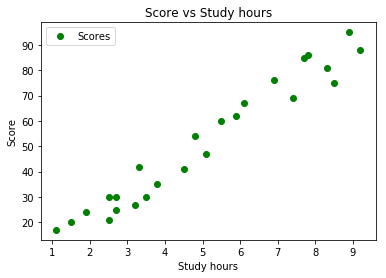

In [6]:
#plotting the data to check for any relationships#
df.plot(x='Hours',y='Scores',style='go')
plt.title('Score vs Study hours')
plt.xlabel('Study hours')
plt.ylabel('Score')
plt.show()

><b>Percentage score and Study hours have a linear relationship with each other, as visible from the graph</b>

><b>We use Linear Regression to predict Score of a student based on number of study hours
<br>Percentage is the response or dependent variable and Study hours is the predictor or independent variable<b>


In [10]:
#assigning response and preditor variables to the dataset#
X = df.iloc[:,:-1].values       #all rows of column 1 are assigned to variable X#
y = df.iloc[:,1].values         #all rows of column 2 are assigned to variable Y#

In [11]:
#splitting dataset into training and test#
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)  
#training is 70% and test is 30% of dataset#

In [12]:
#training the model#
from sklearn.linear_model import LinearRegression
r = LinearRegression()
r.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
#retrieve intercept and co-efficient#
print(r.intercept_)
print(r.coef_)

2.370815382341881
[9.78856669]


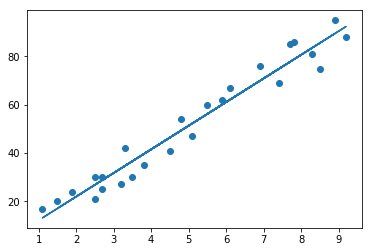

In [14]:
#show regression line#
line = (r.coef_*X) + r.intercept_

plt.scatter(X,y)
plt.plot(X,line);
plt.show()

In [15]:
#making predictions by using test data#
y_pred = r.predict(X_test)

In [16]:
#display actual vs predicted values#
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [17]:
#predict score for a student who studies for 9.25 hours per day#
#r.predict(np.array(9.25).reshape(-1, 1))
r.predict([[9.25]])

array([92.91505723])

><b>Score of student who studies for 9.25 hours is 92.915% <b> 

In [19]:
#evaluate model#
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.419727808027652
Mean Squared Error: 22.96509721270043
Root Mean Squared Error: 4.792191274636315
